In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmentation/Task - Segmentation/images/245_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/442_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/073_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/364_2HC.png
/kaggle/input/segmentation/Task - Segmentation/images/137_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/094_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/001_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/034_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/213_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/291_2HC.png
/kaggle/input/segmentation/Task - Segmentation/images/491_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/253_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/221_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/119_HC.png
/kaggle/input/segmentation/Task - Segmentation/images/157_HC.png
/kaggle/input/segmentat

In [2]:
import cv2
import tensorflow
from sklearn.model_selection import train_test_split
import os

In [11]:
base_dir="/kaggle/input/segmentation/Task - Segmentation/"
base_dir_images="/kaggle/input/segmentation/Task - Segmentation/images"
base_dir_masks="/kaggle/input/segmentation/Task - Segmentation/masks"
img_list=os.listdir(base_dir_images)
mask_list=os.listdir(base_dir_masks)

In [19]:
import numpy as np
import pandas as pd

In [20]:
print(np.asarray(img_list).shape)
print(np.asarray(mask_list).shape)

(622,)
(623,)


In [39]:
hashtable=set()
for i in img_list:
    hashtable.add(i)
opphashtable=set()
for i in mask_list:
    opphashtable.add(i)

In [40]:
for i in mask_list:
    i=i.replace("_Annotation","")
    if i not in hashtable:
        print(i, "not in image_list but present in mask_table\n")
for i in img_list:
    a,b=i.split(".")
    i=a+"_Annotation."+b
#     print(i)
    if i not in opphashtable:
        print(i, "not in mask_list but present in image_list")

desktop.ini not in image_list but present in mask_table



In [43]:
if "desktop.ini" in opphashtable:
    print("yes")

yes


In [44]:
os.remove(os.path.join(base_dir_masks,'desktop.ini'))

OSError: [Errno 30] Read-only file system: '/kaggle/input/segmentation/Task - Segmentation/masks/desktop.ini'

In [45]:
mask_list.remove("desktop.ini")

In [48]:
# mask_list.remove("desktop.ini")

In [49]:
for i in zip(img_list,mask_list):
    print(i)
# this shows they are not alinged

('245_HC.png', '492_HC_Annotation.png')
('442_HC.png', '237_2HC_Annotation.png')
('073_HC.png', '244_HC_Annotation.png')
('364_2HC.png', '310_HC_Annotation.png')
('137_HC.png', '259_HC_Annotation.png')
('094_HC.png', '172_HC_Annotation.png')
('001_HC.png', '015_HC_Annotation.png')
('034_HC.png', '350_HC_Annotation.png')
('213_HC.png', '449_HC_Annotation.png')
('291_2HC.png', '498_HC_Annotation.png')
('491_HC.png', '021_HC_Annotation.png')
('253_HC.png', '460_HC_Annotation.png')
('221_HC.png', '085_HC_Annotation.png')
('119_HC.png', '254_HC_Annotation.png')
('157_HC.png', '376_HC_Annotation.png')
('066_2HC.png', '327_HC_Annotation.png')
('492_HC.png', '203_4HC_Annotation.png')
('495_HC.png', '428_HC_Annotation.png')
('408_HC.png', '443_HC_Annotation.png')
('120_HC.png', '468_HC_Annotation.png')
('123_HC.png', '412_HC_Annotation.png')
('372_HC.png', '325_HC_Annotation.png')
('397_HC.png', '063_3HC_Annotation.png')
('014_HC.png', '483_2HC_Annotation.png')
('359_2HC.png', '304_HC_Annotatio

In [52]:
img_list=sorted(img_list)
mask_list=sorted(mask_list)

In [53]:
for i in zip(img_list,mask_list):
    print(i)

('000_HC.png', '000_HC_Annotation.png')
('001_HC.png', '001_HC_Annotation.png')
('002_HC.png', '002_HC_Annotation.png')
('003_HC.png', '003_HC_Annotation.png')
('004_HC.png', '004_HC_Annotation.png')
('005_HC.png', '005_HC_Annotation.png')
('006_HC.png', '006_HC_Annotation.png')
('007_HC.png', '007_HC_Annotation.png')
('008_HC.png', '008_HC_Annotation.png')
('009_HC.png', '009_HC_Annotation.png')
('010_2HC.png', '010_2HC_Annotation.png')
('010_HC.png', '010_HC_Annotation.png')
('011_HC.png', '011_HC_Annotation.png')
('012_HC.png', '012_HC_Annotation.png')
('013_HC.png', '013_HC_Annotation.png')
('014_2HC.png', '014_2HC_Annotation.png')
('014_3HC.png', '014_3HC_Annotation.png')
('014_HC.png', '014_HC_Annotation.png')
('015_HC.png', '015_HC_Annotation.png')
('016_HC.png', '016_HC_Annotation.png')
('017_2HC.png', '017_2HC_Annotation.png')
('017_HC.png', '017_HC_Annotation.png')
('018_HC.png', '018_HC_Annotation.png')
('019_2HC.png', '019_2HC_Annotation.png')
('019_HC.png', '019_HC_Annotat

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(img_list,mask_list,random_state=42,test_size=0.2)

In [60]:
xtrain

['166_HC.png',
 '246_HC.png',
 '405_HC.png',
 '406_HC.png',
 '313_HC.png',
 '343_HC.png',
 '239_HC.png',
 '331_HC.png',
 '348_HC.png',
 '229_HC.png',
 '206_HC.png',
 '220_HC.png',
 '380_HC.png',
 '033_2HC.png',
 '061_HC.png',
 '436_HC.png',
 '055_HC.png',
 '010_HC.png',
 '361_2HC.png',
 '133_2HC.png',
 '168_HC.png',
 '256_HC.png',
 '067_HC.png',
 '230_HC.png',
 '318_HC.png',
 '064_HC.png',
 '019_2HC.png',
 '143_2HC.png',
 '240_HC.png',
 '451_HC.png',
 '293_HC.png',
 '147_HC.png',
 '165_HC.png',
 '111_HC.png',
 '215_HC.png',
 '470_HC.png',
 '209_HC.png',
 '009_HC.png',
 '411_HC.png',
 '232_HC.png',
 '254_HC.png',
 '490_HC.png',
 '297_HC.png',
 '068_2HC.png',
 '349_HC.png',
 '177_HC.png',
 '236_HC.png',
 '392_2HC.png',
 '394_2HC.png',
 '403_2HC.png',
 '245_HC.png',
 '125_2HC.png',
 '063_2HC.png',
 '075_HC.png',
 '252_HC.png',
 '057_HC.png',
 '014_2HC.png',
 '266_HC.png',
 '157_HC.png',
 '071_HC.png',
 '423_HC.png',
 '096_HC.png',
 '363_HC.png',
 '499_HC.png',
 '026_2HC.png',
 '000_HC.png

In [61]:
ytrain

['166_HC_Annotation.png',
 '246_HC_Annotation.png',
 '405_HC_Annotation.png',
 '406_HC_Annotation.png',
 '313_HC_Annotation.png',
 '343_HC_Annotation.png',
 '239_HC_Annotation.png',
 '331_HC_Annotation.png',
 '348_HC_Annotation.png',
 '229_HC_Annotation.png',
 '206_HC_Annotation.png',
 '220_HC_Annotation.png',
 '380_HC_Annotation.png',
 '033_2HC_Annotation.png',
 '061_HC_Annotation.png',
 '436_HC_Annotation.png',
 '055_HC_Annotation.png',
 '010_HC_Annotation.png',
 '361_2HC_Annotation.png',
 '133_2HC_Annotation.png',
 '168_HC_Annotation.png',
 '256_HC_Annotation.png',
 '067_HC_Annotation.png',
 '230_HC_Annotation.png',
 '318_HC_Annotation.png',
 '064_HC_Annotation.png',
 '019_2HC_Annotation.png',
 '143_2HC_Annotation.png',
 '240_HC_Annotation.png',
 '451_HC_Annotation.png',
 '293_HC_Annotation.png',
 '147_HC_Annotation.png',
 '165_HC_Annotation.png',
 '111_HC_Annotation.png',
 '215_HC_Annotation.png',
 '470_HC_Annotation.png',
 '209_HC_Annotation.png',
 '009_HC_Annotation.png',
 '411_H

In [66]:
# os.mkdir("mydata")
# subdir=["train","test"]

In [87]:
train_img=[]
train_mask=[]
for x,y in zip(xtrain,ytrain):
    imgpath=os.path.join(base_dir_images,x)
    maskpath=os.path.join(base_dir_masks,y)
    img=cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)/255
    img=cv2.resize(img,(800,540))
    img=np.array(img,dtype="float32")
    img=np.round(img,decimals=2)
    train_img.append(img)
    
    mask=cv2.imread(maskpath,cv2.IMREAD_GRAYSCALE)/255
    mask=cv2.resize(mask,(800,540))
    mask=np.array(mask,dtype="float32")
    mask=np.round(mask,decimals=2)
    train_mask.append(mask)

test_img=[]
test_mask=[]
for x,y in zip(xtest,ytest):
    imgpath=os.path.join(base_dir_images,x)
    maskpath=os.path.join(base_dir_masks,y)
    img=cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)/255
    img=cv2.resize(img,(800,540))
    img=np.array(img,dtype="float32")
    img=np.round(img,decimals=2)
    test_img.append(img)
    
    mask=cv2.imread(maskpath,cv2.IMREAD_GRAYSCALE)/255
    mask=cv2.resize(mask,(800,540))
    mask=np.array(mask,dtype="float32")
    mask=np.round(mask,decimals=2)
    test_mask.append(mask)

In [76]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Input,Concatenate

In [125]:
model_input=Input(shape=(540,800, 1))
x1=Conv2D(64, 3, activation='relu', padding='same')(model_input)
x1=BatchNormalization()(x1)
x1=Conv2D(64, 3, activation='relu', padding='same')(x1)
x1=BatchNormalization()(x1)
y1=MaxPooling2D((2,2))(x1)
x2=Conv2D(128, 3, activation='relu', padding='same')(y1)
x2=BatchNormalization()(x2)
x2=Conv2D(128, 3, activation='relu', padding='same')(x2)
x2=BatchNormalization()(x2)
y2=MaxPooling2D((2,2))(x2)
x3=Conv2D(256, 3, activation='relu', padding='same')(y2)
x3=BatchNormalization()(x3)
x3=Conv2D(256, 3, activation='relu', padding='same')(x3)
x3=BatchNormalization()(x3)
y3=MaxPooling2D((5,5))(x3)
x4=Conv2D(512, 3, activation='relu', padding='same')(y3)
x4=BatchNormalization()(x4)
z1=Conv2D(256, 3, activation='relu', padding='same') (UpSampling2D(size=(5, 5))(x4))
merged=Concatenate()([z1,x3])
x5=Conv2D(256, 3, activation='relu', padding='same')(merged)
x5=BatchNormalization()(x5)
x5=Conv2D(256, 3, activation='relu', padding='same')(x5)
x5=BatchNormalization()(x5)
z2=Conv2D(128, 3, activation='relu', padding='same') (UpSampling2D(size=(2, 2))(x5))
merged=Concatenate()([z2,x2])
x6=Conv2D(128, 3, activation='relu', padding='same')(merged)
x6=BatchNormalization()(x6)
x6=Conv2D(128, 3, activation='relu', padding='same')(x6)
x6=BatchNormalization()(x6)
z3=Conv2D(64, 3, activation='relu', padding='same') (UpSampling2D(size=(2, 2))(x6))
merged=Concatenate()([z3,x1])
head=Conv2D(64, 3, activation='relu', padding='same')(merged)
head=Conv2D(64, 2, activation='relu', padding='same')(head)
head=Conv2D(5, 1, activation='relu', padding='same')(head)
head=Conv2D(1,1, activation='sigmoid')(head)
model=tensorflow.keras.models.Model(inputs=model_input, outputs=head)

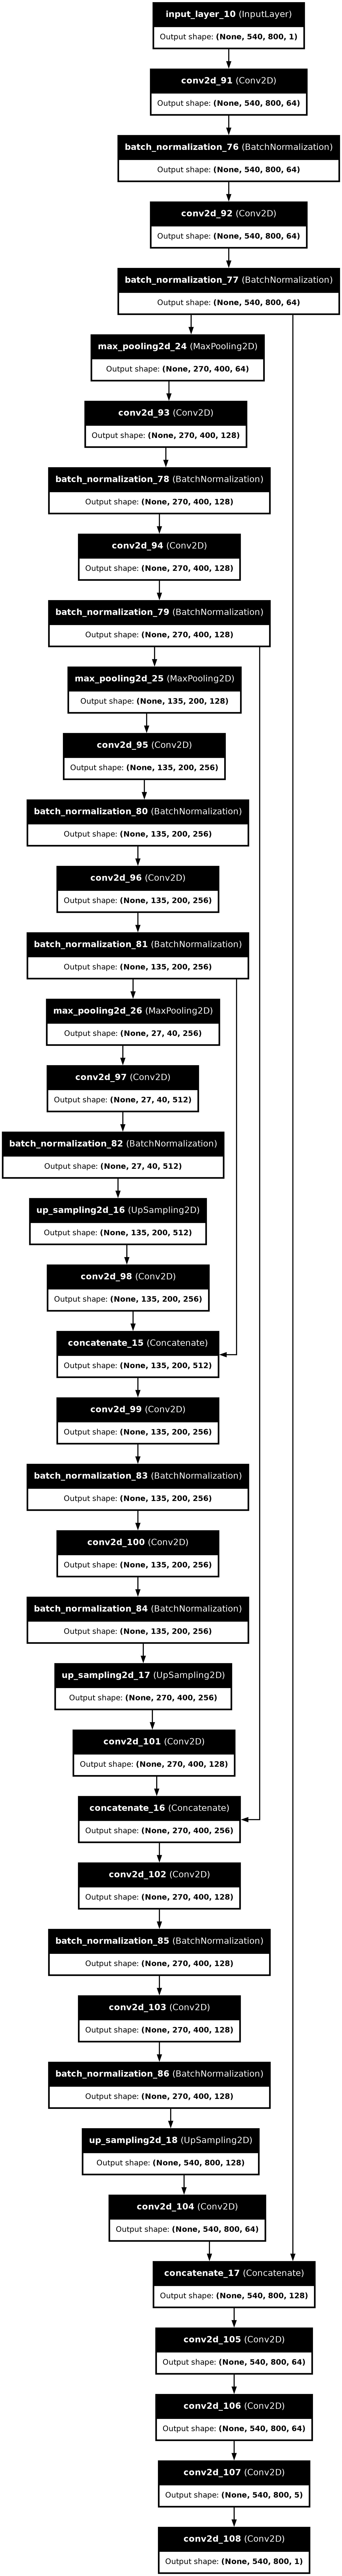

In [126]:
tensorflow.keras.utils.plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

In [127]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 540, 800,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_91 (Conv2D)  │ (None, 540, 800,  │        640 │ input_layer_10[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 540, 800,  │        256 │ conv2d_91[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_92 (Conv2D)  │ (None, 540, 800,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 540, 800,  │        256 │ conv2d_92[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 270, 400,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_93 (Conv2D)  │ (None, 270, 400,  │     73,856 │ max_pooling2d_24… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 270, 400,  │        512 │ conv2d_93[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 270, 400,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 270, 400,  │        512 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 135, 200,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 135, 200,  │    295,168 │ max_pooling2d_25… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 135, 200,  │      1,024 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 135, 200,  │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 135, 200,  │      1,024 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 27, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 27, 40,    │  1,180,160 │ max_pooling2d_26

 Total params: 6,185,035 (23.59 MB)

 Trainable params: 6,180,683 (23.58 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [128]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-3),
              loss="binary_crossentropy",metrics=["accuracy"])

In [129]:
print(np.asarray(train_img).shape)
print(np.asarray(train_mask).shape)
tr=np.asarray(train_img).reshape((497, 540, 800,1))

(497, 540, 800, 1)
(497, 540, 800, 1)


In [130]:
train_img=np.asarray(train_img).reshape((497, 540, 800,1))
train_mask=np.asarray(train_mask).reshape((497, 540, 800,1))

In [132]:
history=model.fit(train_img,train_mask,epochs=10,batch_size=1)

Epoch 1/10


2024-04-25 02:49:24.441755: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.54174, expected 0.957415
2024-04-25 02:49:24.441810: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.73439, expected 1.15007
2024-04-25 02:49:24.441820: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.11591, expected 1.53159
2024-04-25 02:49:24.441829: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.20735, expected 1.62302
2024-04-25 02:49:24.441837: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.7007, expected 2.11637
2024-04-25 02:49:24.441845: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.74146, expected 2.15713
2024-04-25 02:49:24.441864: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.88847, expected 2.30415
2024-04-25 02:49:24.441877: E external/local_xla/xla/se

  1/497 ━━━━━━━━━━━━━━━━━━━━ 3:36:40 26s/step - accuracy: 0.9959 - loss: 0.2808

I0000 00:00:1714013388.939647      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


497/497 ━━━━━━━━━━━━━━━━━━━━ 105s 159ms/step - accuracy: 0.9928 - loss: 0.0537
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9927 - loss: 0.0388
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0373
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0350
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0353
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0343
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0336
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9929 - loss: 0.0328
Epoch 9/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0331
Epoch 10/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 79s 159ms/step - accuracy: 0.9928 - loss: 0.0327


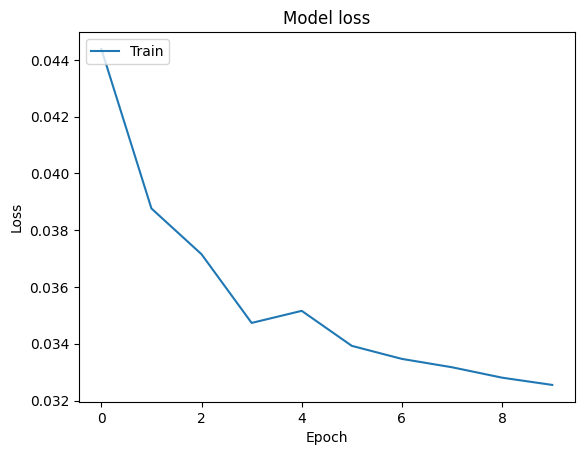

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
# plt.plot(history.history['v'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [138]:
# from keras.models
model.save('my_model.keras')

In [139]:
model_input2=Input(shape=(540,800, 1))
x1=Conv2D(64, 3, activation='relu', padding='same')(model_input2)
x1=BatchNormalization()(x1)
x1=Conv2D(64, 3, activation='relu', padding='same')(x1)
x1=BatchNormalization()(x1)
y1=MaxPooling2D((2,2))(x1)
x2=Conv2D(128, 3, activation='relu', padding='same')(y1)
x2=BatchNormalization()(x2)
x2=Conv2D(128, 3, activation='relu', padding='same')(x2)
x2=BatchNormalization()(x2)
y2=MaxPooling2D((2,2))(x2)
x3=Conv2D(256, 3, activation='relu', padding='same')(y2)
x3=BatchNormalization()(x3)
# x3=Conv2D(256, 3, activation='relu', padding='same')(x3)
# x3=BatchNormalization()(x3)
# y3=MaxPooling2D((5,5))(x3)
# x4=Conv2D(512, 3, activation='relu', padding='same')(y3)
# x4=BatchNormalization()(x4)
# z1=Conv2D(256, 3, activation='relu', padding='same') (UpSampling2D(size=(5, 5))(x4))
# merged=Concatenate()([z1,x3])
# x5=Conv2D(256, 3, activation='relu', padding='same')(merged)
# x5=BatchNormalization()(x5)
# x5=Conv2D(256, 3, activation='relu', padding='same')(x5)
# x5=BatchNormalization()(x5)
# z2=Conv2D(128, 3, activation='relu', padding='same') (UpSampling2D(size=(2, 2))(x5))
z2=Conv2D(128, 3, activation='relu', padding='same') (UpSampling2D(size=(2, 2))(x3))
merged=Concatenate()([z2,x2])
x6=Conv2D(128, 3, activation='relu', padding='same')(merged)
x6=BatchNormalization()(x6)
x6=Conv2D(128, 3, activation='relu', padding='same')(x6)
x6=BatchNormalization()(x6)
z3=Conv2D(64, 3, activation='relu', padding='same') (UpSampling2D(size=(2, 2))(x6))
merged=Concatenate()([z3,x1])
head=Conv2D(64, 3, activation='relu', padding='same')(merged)
head=Conv2D(64, 2, activation='relu', padding='same')(head)
head=Conv2D(5, 1, activation='relu', padding='same')(head)
head=Conv2D(1,1, activation='sigmoid')(head)
model2=tensorflow.keras.models.Model(inputs=model_input2, outputs=head)

In [141]:
model2.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),loss="binary_crossentropy",metrics=["accuracy"])
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=3, min_lr=0.00001)
checkpoint_path = "best_model.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

history2=model2.fit(train_img,train_mask
          ,epochs=10,batch_size=4,validation_split=0.3,callbacks=[reduce_lr,checkpoint])              

Epoch 1/10


2024-04-25 03:06:58.375981: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432000: 0.904171, expected 0.668042
2024-04-25 03:06:58.376053: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432011: 1.10378, expected 0.867651
2024-04-25 03:06:58.376064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432012: 1.34208, expected 1.10595
2024-04-25 03:06:58.376074: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432030: 1.04589, expected 0.80976
2024-04-25 03:06:58.376083: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432031: 1.21288, expected 0.976756
2024-04-25 03:06:58.376092: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432032: 0.878466, expected 0.642337
2024-04-25 03:06:58.376101: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 432056: 1.29844, expected 1.06232
2024-04-25 03:

86/87 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.9425 - loss: 0.2259

2024-04-25 03:08:35.032264: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.48013, expected 0.853178
2024-04-25 03:08:35.032336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.30327, expected 0.676313
2024-04-25 03:08:35.032371: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.44356, expected 0.816601
2024-04-25 03:08:35.032390: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.94602, expected 1.31906
2024-04-25 03:08:35.032404: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.58849, expected 0.961532
2024-04-25 03:08:35.032415: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.19818, expected 1.57122
2024-04-25 03:08:35.032426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.91181, expected 1.28485
2024-04-25 03:08:35.032437: E external/local_xla/xl

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.9429 - loss: 0.2247

2024-04-25 03:09:25.075628: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.0892, expected 1.1016
2024-04-25 03:09:25.075696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.35833, expected 1.37073
2024-04-25 03:09:25.075710: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.8782, expected 1.89059
2024-04-25 03:09:25.075724: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.51514, expected 1.52753
2024-04-25 03:09:25.075741: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05415, expected 2.06654
2024-04-25 03:09:25.075753: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.48159, expected 2.49398
2024-04-25 03:09:25.075764: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.96341, expected 1.97581
2024-04-25 03:09:25.075774: E external/local_xla/xla/servi


Epoch 1: accuracy improved from -inf to 0.97719, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9433 - loss: 0.2234 - val_accuracy: 0.3071 - val_loss: 0.8566 - learning_rate: 1.0000e-04
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.9926 - loss: 0.0406
Epoch 2: accuracy improved from 0.97719 to 0.99254, saving model to best_model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 45s 515ms/step - accuracy: 0.9926 - loss: 0.0406 - val_accuracy: 0.6750 - val_loss: 0.6048 - learning_rate: 1.0000e-04
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9924 - loss: 0.0409
Epoch 3: accuracy did not improve from 0.99254
87/87 ━━━━━━━━━━━━━━━━━━━━ 45s 513ms/step - accuracy: 0.9924 - loss: 0.0408 - val_accuracy: 0.6356 - val_loss: 0.5816 - learning_rate: 1.0000e-04
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9924 - loss: 0.0405
Epoch 4: accuracy improved from 0.99254 to 0.99261, saving model to best_model.keras
87/87 